In [1]:
from mt_rent_statement import *

### Load data

In [2]:
start='2022-11-01'
end='2022-11-30'
dfT=load_tenancies('all_tenancies.xls')
dfAll=load_data(start,end)
dfAll.head(3)

WARNING *** file size (102054) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Reading file: E:\dtuklaptop\e\Users\Mat\python\data\property\checked\NOV2022_codedAndCategorised.xlsx


E:\dtuklaptop\e\Users\Mat\python\14. property\PropertyAnalytics_v2\mt_rent_statement.py:163: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  dfAll=pd.concat([dfAll,dfTemp])


,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat
2022-11-01,20-74-09 60458872,-220.72,Direct Debit,CHL HOME LOAN CHL00002/907372200 DD,F2169FAW,NaN,Mortgage,NaN
2022-11-01,20-53-97 30728691,-722.99,Direct Debit,NRAM NRD00001/631516204 DD,23CHAM,NaN,Mortgage,NaN
2022-11-01,20-53-97 30728691,-332.44,Direct Debit,TOPAZ FIN JASPER PRU00010/190859005 DD,F31618ALH,NaN,Mortgage,NaN


### Rent Statement

In [3]:
paidinadvancelist = ['Peter Gradon (28/02/2018)']  # November
inarrearslist = ['Mark Williams (25/09/2019)']
dfRs=get_rent_statement(dfAll, dfT, start, end, inarrearslist, paidinadvancelist)
dfRs=dfRs.round(0)
#dfRs.sort_values(by=['Net'], ascending=False).style.apply(custom_style, axis=1)
#dfRs.sort_values(by=['Bills'], ascending=True).style.apply(custom_style, axis=1)
dfRs.style.apply(custom_style, axis=1)

,Tenant,Agent,Received,Bills,Mortgage,Net,Status
Property,,,,,,,
321 London Rd,,,0,-360,0,-360,
Flat 1 - 321 London Rd,Soumya Xaviour (19/02/2022),None,0,-233,-285,-518,NotPaid
Flat 2 - 321 London Rd,Cipran Georgescu (18/01/2020),None,625,0,-278,347,Paid
Flat 3 - 321 London Rd,Charles Prescott (01/10/2022),None,1800,0,-222,1578,Paid
Flat 4 - 321 London Rd,,,0,-90,-285,-375,Empty
169 Fawcett Rd,,,0,-15,0,-15,
Flat 1 - 169 Fawcett Rd,Susan Parkinson (06/11/2016),Beals,421,-70,-256,95,Paid
Flat 2 - 169 Fawcett Rd,Vaclav Hajek (10/08/2019),None,600,-70,-221,309,Paid
Flat 3 - 169 Fawcett Rd,August John (14/05/2022),None,675,-156,-280,239,Paid


Notes:
- Susheel move out
- 5 empty -> F1, 321, F3 321, F4 321, F8 46, F20 46
- Mark Williams didn't pay
- Graddon paid 6 months advance in Sept to March - Gradon was served S13 rent increase
- check rent increases in Dec for McIlwraith, England, Milligan

### Income/Expenditure per Property

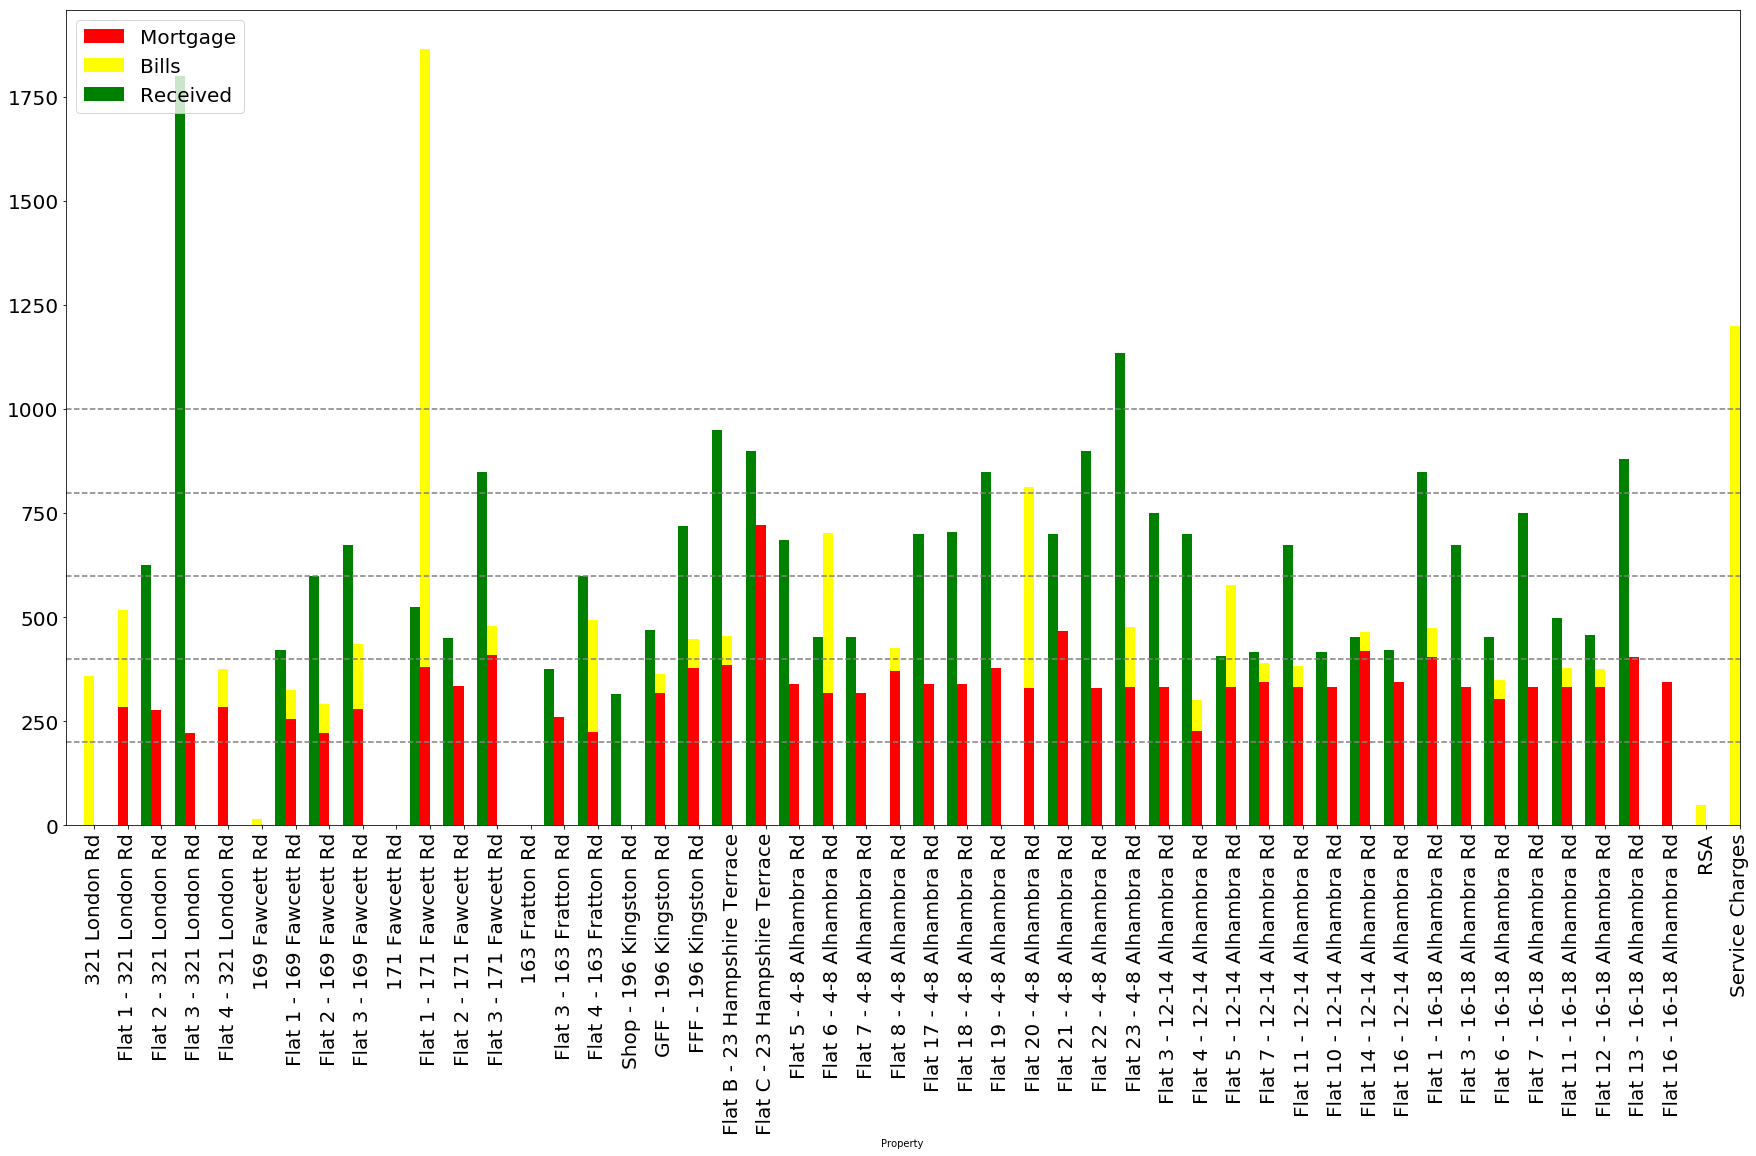

In [4]:
plot_income_expenditure_per_property(dfRs[:-1])

### Net Income Per Property

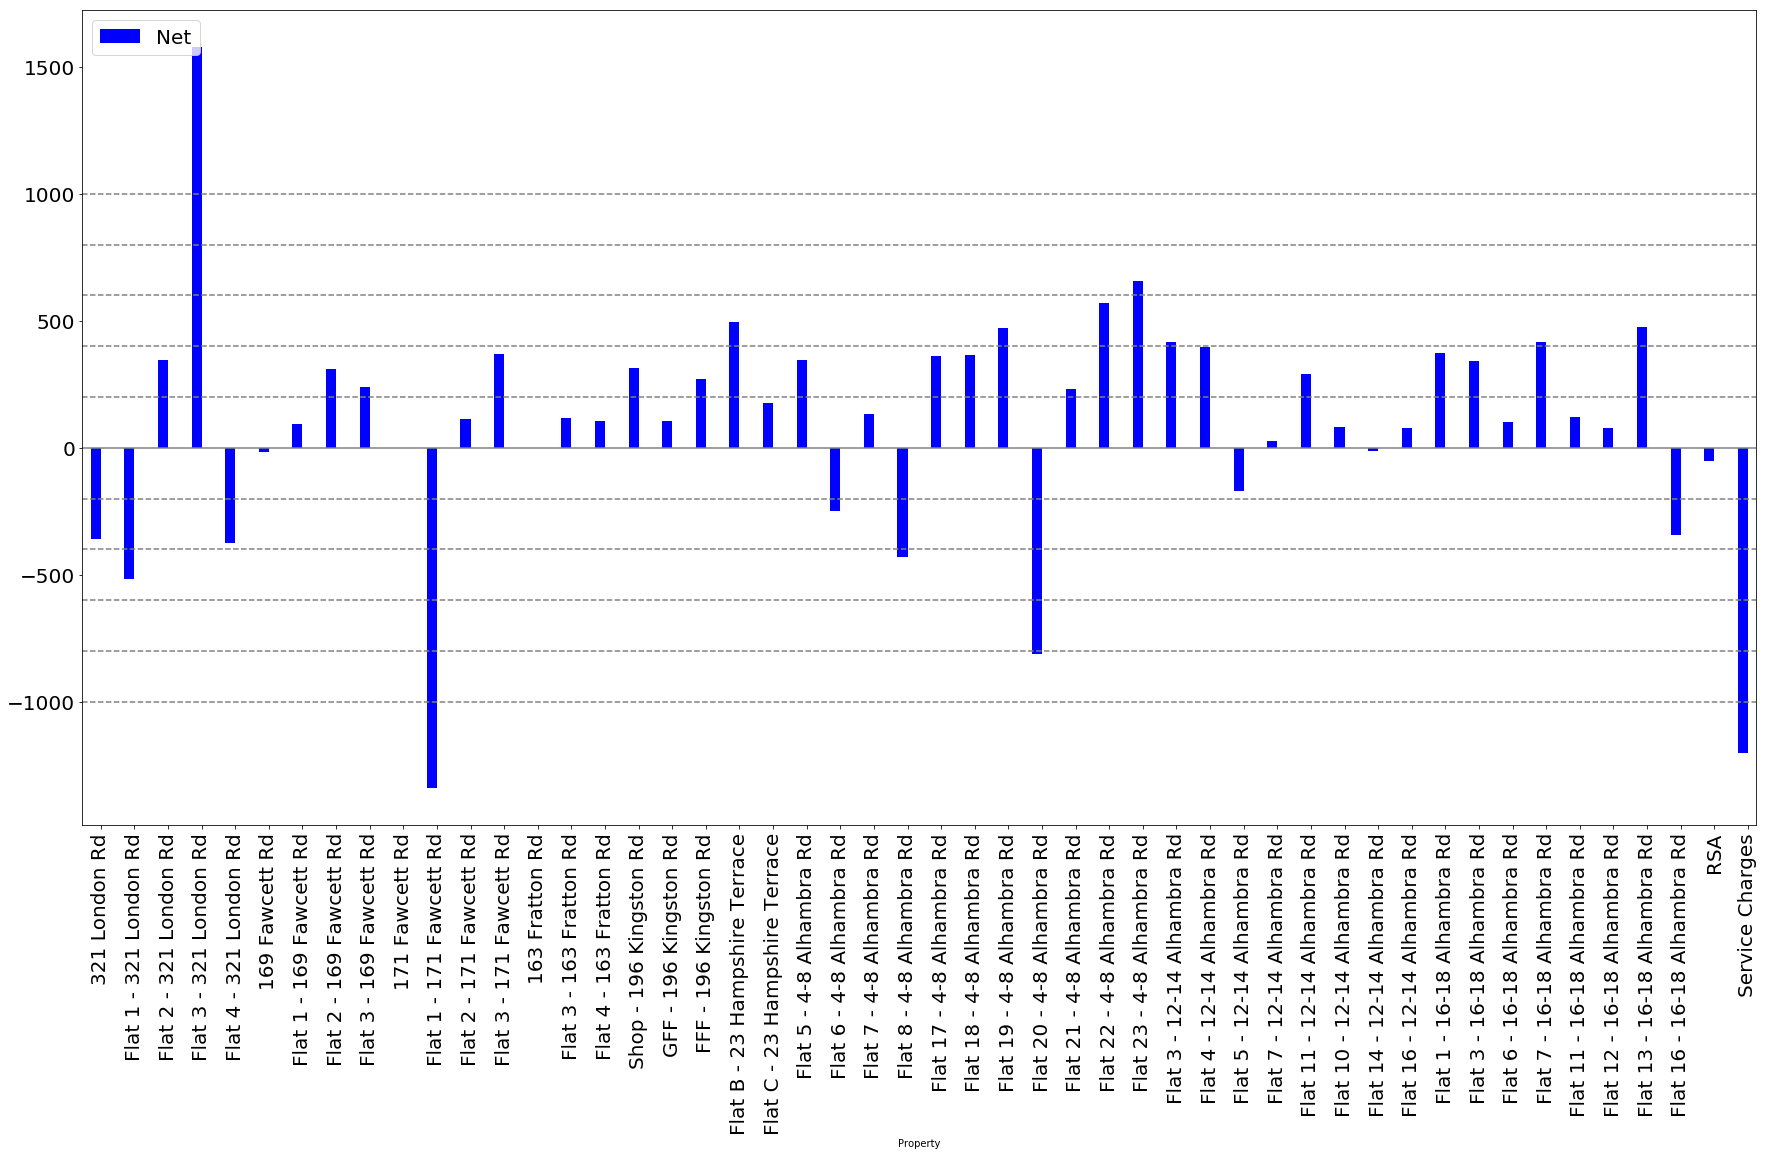

In [5]:
plot_net_income(dfRs[:-1])

### Accounts Check
Check Drawings against expenses

In [6]:
dfAll[(dfAll.Cat=='RegularPayment')|(dfAll.Cat=='PersonalExpense')|(dfAll.Cat=='Hilltop')|(dfAll.Cat=='HMRCDD')|(dfAll.Cat=='Drawings')|(dfAll.Cat=='SchoolFee')].groupby(['Cat']).sum()

,Amount
Cat,
Drawings,-2400.00
HMRCDD,-600.00
Hilltop,-300.00
PersonalExpense,-3562.05
RegularPayment,-1072.05
SchoolFee,-5688.99


In [7]:
dfAll.groupby(['Account','Cat']).sum().style.apply(custom_style_accounts_cat, axis=1)

#### Mortgage check
Check mortgages refunded from business account

In [8]:
dfMtg=dfAll[((dfAll.Cat=='Mortgage')|(dfAll.Cat=='MortgageRefund'))&(dfAll.Account!='60-83-71 00558156')].groupby(['Account','Cat']).Amount.sum()
dfMtg=dfMtg.reset_index().pivot('Account','Cat')
dfMtg.columns=dfMtg.columns.get_level_values(1)
if('MortgageRefund' not in dfMtg.columns):
    dfMtg['MortgageRefund']=0
dfMtg['Diff']=dfMtg.Mortgage + dfMtg.MortgageRefund
dfMtg

Cat,Mortgage,MortgageRefund,Diff
Account,,,
20-53-97 30728691,-6014.63,2294.39,-3720.24
20-74-09 60458872,-8551.23,6728.66,-1822.57


In [9]:
dfMtg['Diff'].sum()

-5542.810000000003

#### Rent check
Rents going to wrong account

In [10]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='OurRent')]

,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat
2022-11-07,20-53-97 30728691,285.0,Counter Credit,F23 4-6ALHAMBRA SEQUENCE UK LIMI BGC,F2346ALH,Need to move,OurRent,NaN
2022-11-10,20-53-97 30728691,-480.9,Bill Payment,RSA CAPITAL LIMITE 16 16-18 JAN 2023 BBP,F161618ALH,What was this?,OurRent,NaN
2022-11-25,20-53-97 30728691,675.0,Standing Order,MR MICHAEL BETTS FT11 12-14ALHAMBRA ST,F111214ALH,NaN,OurRent,NaN
2022-11-28,20-53-97 30728691,-675.0,Bill Payment,RSA CAPITAL LIMITE M BETTSRENT 111214 BB,F111618ALH,NaN,OurRent,NaN
2022-11-30,20-53-97 30728691,720.0,Counter Credit,M Williams RENT BGC,196BKIN,Need to move,OurRent,NaN


In [11]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='OurRent')].groupby(['Cat']).sum()

,Amount
Cat,
OurRent,524.1


#### Property expense check
Property expenses and service charges taken from 3072 or 6045

In [12]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='PropertyExpense')]

,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat
2022-11-11,20-74-09 60458872,-15.0,Standing Order,SSE SOUTHERN ELECT 6882766014 STO,169FAW,Move over,PropertyExpense,NaN


In [13]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='PropertyExpense')].groupby(['Cat']).sum()

,Amount
Cat,
PropertyExpense,-15.0


In [14]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='ServiceCharge')]

,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat


In [15]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='ServiceCharge')].groupby(['Cat']).sum()

,Amount
Cat,
